In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf 

from tensorflow import keras
from tensorflow.keras import layers

In [12]:
data_train_path = "Fruits_Vegetables/train"
data_test_path = "Fruits_Vegetables/test"
data_val_path = "Fruits_Vegetables/validation"

In [13]:
img_width = 180
img_height = 180

Load the dataset into a array

In [18]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    # split the dataset the into training and validation sets
    validation_split=False
)

Found 3115 files belonging to 36 classes.


Checking for classes in the dataset

In [21]:
data_cat = data_train.class_names

Validation Dataset - Evalute the performance of a machine learning model durin training and to tune hyperparamters without overtfitting the training dataset

In [23]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size = (img_width, img_height),
    batch_size = 32,
    shuffle = False,
    # split the dataset the into training and validation sets
   validation_split = False
)

Found 351 files belonging to 36 classes.


Test Dataset

In [25]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size = (img_width, img_height),
    batch_size = 32,
    shuffle = False,
    # split the dataset the into training and validation sets
   validation_split = False
)

Found 359 files belonging to 36 classes.


Printing images to the console

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')
plt.show()

Dataset will devided into three colors - RGB

Building Sequential Model

In [36]:
from tensorflow.keras.models import Sequential

In [38]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [41]:
model = Sequential([
    # rescaling each color in between one an zero
    layers.Rescaling(1./255),
    # creating 3 layers with 16 nuerons
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    # Dropout is used, so model will not overfit
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [42]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

Training model

In [43]:
# model will iterate 25 times over the entire training dataset
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 297ms/step - accuracy: 0.0521 - loss: 3.8356 - val_accuracy: 0.3020 - val_loss: 2.6249
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 311ms/step - accuracy: 0.2597 - loss: 2.6790 - val_accuracy: 0.5185 - val_loss: 1.7603
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 327ms/step - accuracy: 0.4617 - loss: 1.8976 - val_accuracy: 0.7664 - val_loss: 0.9085
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 334ms/step - accuracy: 0.6720 - loss: 1.1630 - val_accuracy: 0.8832 - val_loss: 0.5588
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 323ms/step - accuracy: 0.8103 - loss: 0.6904 - val_accuracy: 0.9402 - val_loss: 0.4027
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 333ms/step - accuracy: 0.9042 - loss: 0.3736 - val_accuracy: 0.9117 - val_loss: 0.4696
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 322ms/step - accuracy: 0.9269 - loss: 0.2953 - val_accuracy: 0.9316 - val_loss: 0.3618
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 321ms/step - accuracy: 0.9385 - loss: 0.2241 - val_accu

Checking accuracy and loss of training and validation of the model

Text(0.5, 1.0, 'Loss')

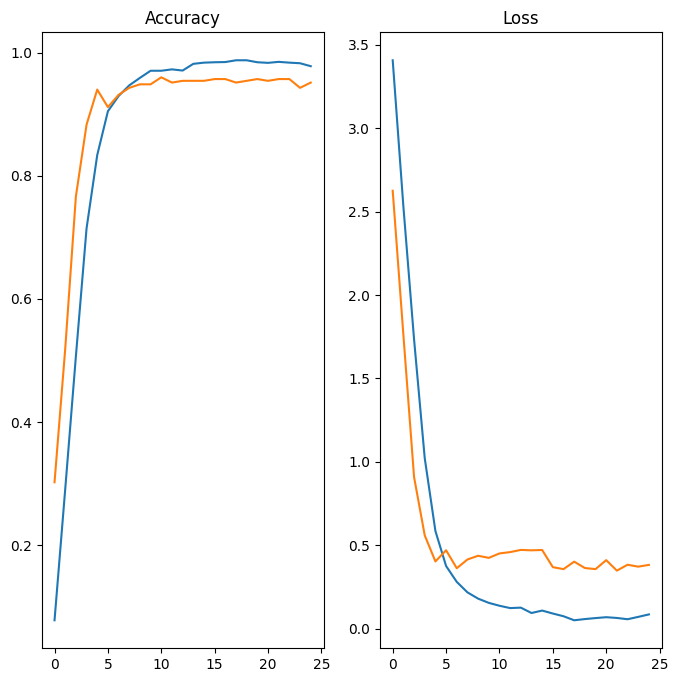

In [47]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [65]:
image = "Chilli.jpeg"
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

Testing the model

In [66]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [67]:
score = tf.nn.softmax(predict)
score

<tf.Tensor: shape=(1, 36), dtype=float32, numpy=
array([[5.4484275e-03, 1.2217492e-16, 3.4448989e-02, 8.1777478e-05,
        2.1399657e-21, 9.7774355e-05, 8.7080392e-11, 2.0220767e-12,
        8.3946800e-01, 6.0693253e-13, 7.4198716e-17, 1.4245550e-12,
        9.5195150e-20, 4.3751708e-15, 9.6135372e-13, 1.0042920e-04,
        6.7490650e-26, 5.1460136e-23, 8.1834987e-16, 1.0407733e-07,
        8.3694126e-14, 1.3648640e-12, 2.3935093e-02, 9.6385368e-18,
        1.8353415e-18, 6.7417842e-18, 9.4710454e-02, 2.3004327e-06,
        3.4648008e-05, 4.2557286e-15, 1.9876280e-19, 1.4902345e-13,
        2.1498605e-05, 1.5980005e-03, 7.1495886e-12, 5.2511921e-05]],
      dtype=float32)>

In [68]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is chilli pepper with accuracy of 83.95


In [69]:
model.save('Image_Classify.keras')